In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [3]:
# Use loadmat to load matlab files
mat = loadmat("ex3data1.mat")
X = mat["X"]
y = mat["y"]

In [4]:
m = X.shape[0]
print(X.shape)

(5000, 400)


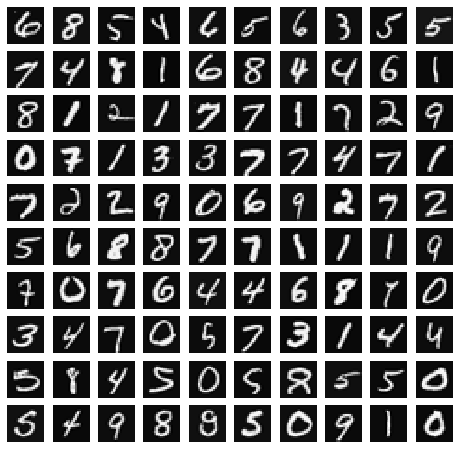

In [5]:
import random
import matplotlib.image as mpimg

fig, axis = plt.subplots(10,10,figsize=(8,8))

for i in range(10):
    for j in range(10):
        axis[i,j].imshow(X[random.randint(0,m),:].reshape(20,20,order="F"), cmap="gray")
        axis[i,j].axis("off")

### Loading parameters

In [6]:
# loading pre-calculated weights for neural network
weights = loadmat("ex3weights.mat")

In [7]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']

print(theta1.shape, theta2.shape)

(25, 401) (10, 26)


### Predicting

In [8]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
def predict(theta1, theta2, X):
    m = X.shape[0]
    num_labels = theta2.shape[0]
    
    # Inputn Layer
    X = np.hstack([np.ones((m,1)), X]) # 5000x401
    
    # Activation functions - Hidden Layer
    A = sigmoid(np.dot(X, theta1.T)) # 5000x401 * 401x25
    A = np.hstack([np.ones((m,1)), A]) # 5000x26
    
    # Output Layer
    h = sigmoid(np.dot(A, theta2.T)); # 5000x26 * 26x10 = 5000x10
    
    # Predicted values
    p = np.zeros((m,1))
    
    for i in range(m):
        p[i] = h[i].argmax() + 1
        
    return p

In [10]:
pred = predict(theta1, theta2, X)

In [11]:
print(np.mean(pred == y)*100)

97.52
